In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv',index_col=[0])
X_test = pd.read_csv('test.csv',index_col=[0])

In [3]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


### 3. 전체 데이터 중 결측치를 각 컬럼의 최빈값으로 대체합니다.
 - 결측치 있는 컬럼 : workclass, occupation, native-country

In [4]:
# 최빈값을 파악하기 위해 value_counts 사용
train['workclass'].value_counts()

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 ?                    1663
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [5]:
X_test['workclass'].value_counts()

 Private             13496
 Self-emp-not-inc     1557
 Local-gov            1268
 ?                    1136
 State-gov             780
 Self-emp-inc          708
 Federal-gov           578
 Without-pay             9
 Never-worked            5
Name: workclass, dtype: int64

In [6]:
# workclass의 최빈값은 Private이므로 결측값을 전부 Private로 변환
train['workclass'] = train['workclass'].replace(" ?", " Private")
X_test['workclass'] = X_test['workclass'].replace(" ?", " Private")

In [7]:
train['occupation'].value_counts()

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
 ?                    1668
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [8]:
X_test['occupation'].value_counts()

 Craft-repair         2480
 Exec-managerial      2477
 Prof-specialty       2448
 Sales                2212
 Adm-clerical         2171
 Other-service        1948
 Machine-op-inspct    1211
 ?                    1141
 Transport-moving      962
 Handlers-cleaners     823
 Farming-fishing       602
 Tech-support          581
 Protective-serv       380
 Priv-house-serv        96
 Armed-Forces            5
Name: occupation, dtype: int64

In [9]:
ocp_tr = train[train['occupation'] == " ?"]

In [10]:
ocp_tr

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
20,18,Private,220168,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States,0
21,23,Private,194096,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
25,19,Private,50626,Some-college,10,Never-married,?,Own-child,Black,Female,0,0,20,United-States,0
38,24,Private,152719,Some-college,10,Never-married,?,Own-child,Black,Female,0,0,15,Haiti,0
48,23,Private,62507,Some-college,10,Never-married,?,Not-in-family,White,Female,0,0,12,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29245,28,Private,196630,Assoc-voc,11,Separated,?,Unmarried,White,Female,0,0,40,Mexico,0
29248,50,Private,23780,Masters,14,Married-spouse-absent,?,Other-relative,White,Male,0,0,40,United-States,0
29281,22,Private,110622,Bachelors,13,Never-married,?,Own-child,Asian-Pac-Islander,Female,0,0,15,Taiwan,0


In [11]:
ocp_tr[ocp_tr['workclass'] == " Never-worked"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
4060,17,Never-worked,131593,11th,7,Never-married,?,Own-child,Black,Female,0,0,20,United-States,0
9899,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,0
11468,18,Never-worked,162908,11th,7,Never-married,?,Own-child,White,Male,0,0,35,United-States,0
18423,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,0
22248,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,0


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='workclass', ylabel='count'>

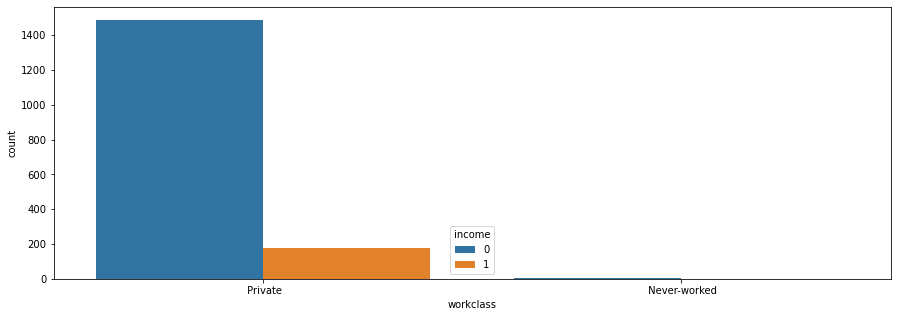

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data=ocp_tr,
             x='workclass',
             hue='income'
             )

1. ?그대로 쓴다 
2. 다른 값들 고려해서 채워주는 러신머닝을 한다.
3. 삭제 x 
4. workclass = occupation 모두 결측치인 경우가 많았다.

In [14]:
# 최빈값 : Prof-specialty(전문직)
# but 6위까지 크게 차이가 없음... occupation은 최빈값 쓰는거 위험할듯 함. 일단 코드만 적어놓음
# train['occupation'] = train['occupation'].replace(" ?", " Pre-specialty")
# test['occupation'] = test['occupation'].replace(" ?", " Craft-repair")

In [15]:
train['native-country'].value_counts()

 United-States                 26301
 Mexico                          579
 ?                               495
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Columbia                         53
 Poland                           53
 Haiti                            51
 Guatemala                        51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Greece                           25
 

In [16]:
X_test['native-country'].value_counts()

 United-States                 17531
 Mexico                          372
 ?                               362
 Philippines                     117
 Germany                          82
 Canada                           71
 Puerto-Rico                      67
 India                            61
 El-Salvador                      59
 China                            54
 England                          52
 Italy                            45
 Cuba                             44
 Dominican-Republic               42
 South                            41
 Japan                            38
 Jamaica                          38
 Guatemala                        37
 Vietnam                          36
 Poland                           34
 Columbia                         32
 Taiwan                           26
 Greece                           24
 Ecuador                          24
 Haiti                            24
 Portugal                         24
 Nicaragua                        21
 

In [17]:
# 최빈값 : United-States(미국) 26301 => 26796
# 결측치 495개 => United-States로 변환
train['native-country'] = train['native-country'].replace(" ?", " United-States")
X_test['native-country'] = X_test['native-country'].replace(" ?", " United-States")

In [18]:
# X_train : income 제외한 나머지
# y_train : train['income']
# X_test : test
# y_test : sample_submission

In [19]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [20]:
X_train = train.loc[:,:'native-country']
y_train = train.loc[:,'income']

In [21]:
y_train

no
1        0
2        0
3        0
4        0
5        1
        ..
29301    0
29302    0
29303    0
29304    0
29305    0
Name: income, Length: 29305, dtype: int64

In [22]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [23]:
tmp = X_train['native-country_ Holand-Netherlands']

In [24]:
X_train.drop('native-country_ Holand-Netherlands', axis = 1, inplace=True)

In [25]:
X_train = pd.concat([X_train, tmp],axis=1)

In [26]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_ Holand-Netherlands
no,,,,,,,,,,,,,,,,,,,,,
1,25,219199,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,39,52978,10,0,1721,55,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,35,196899,13,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,64,135527,11,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,24,60783,10,0,0,70,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,100605,9,0,0,40,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
29302,21,372636,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
29303,18,258474,6,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
X_test

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_ Holand-Netherlands
no,,,,,,,,,,,,,,,,,,,,,
29306,18,245274,10,0,0,16,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
29307,29,83003,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
29308,45,35136,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
29309,42,64631,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29310,41,195821,16,0,1902,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,116789,9,0,0,60,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48839,48,185079,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
48840,63,117473,10,4386,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [30]:
X_test['native-country_ Holand-Netherlands'] = 0

In [31]:
!pip install lightgbm

In [32]:
!pip install xgboost

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [36]:
lgb_model = LGBMClassifier(n_estimators = 1000, learning_rate=0.01, random_state=123)
lgb_model.fit(X_train, y_train) # transform_X_train

xg_model = XGBClassifier(n_estimators = 100, learning_rate=0.01, random_state = 123)
xg_model.fit(X_train, y_train) # transform_X_train

forest_model = RandomForestClassifier(n_estimators=100, random_state= 11)
forest_model.fit(X_train, y_train) # transform_X_train

C:\1\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:22:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomForestClassifier(random_state=11)

In [ ]:
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

acc_result = cross_val_score(xg_model, # 모델
                         transform_X_train, # transform_X_train
                         y_train,
                         cv = kfold,
                        )

print(acc_result.mean())


In [ ]:
f1_result = cross_val_score(xg_model, # 모델
                         transform_X_train, # transform_X_train
                         y_train,
                         cv = kfold,
                         scoring='f1'
                        )

print(f1_result.mean())


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
transform_X_train = scaler.transform(X_train)
transform_X_train

In [ ]:
transform_X_test = scaler.transform(X_test)
transform_X_test

In [42]:
result = pd.read_csv('sample_submission.csv')
result

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [43]:
pre = lgb_model.predict(X_test)

In [47]:
result['income'] = pre

In [45]:
result.to_csv('submissiona.csv', index=False)

In [46]:
result

,no,income
0,29306,0
1,29307,0
2,29308,1
3,29309,0
4,29310,1
...,...,...
19532,48838,0
19533,48839,0
19534,48840,1
19535,48841,0
